In [1]:
!head $HOME/datasets/EMG/EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt

time	channel1	channel2	channel3	channel4	channel5	channel6	channel7	channel8	class
1	1e-05	-2e-05	-1e-05	-3e-05	0	-1e-05	0	-1e-05	0
5	1e-05	-2e-05	-1e-05	-3e-05	0	-1e-05	0	-1e-05	0
6	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
7	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
8	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
9	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
10	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
11	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
12	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0


In [2]:
import torch

torch.version.__version__

'1.13.0a0+git49444c3'

In [3]:
import os
from glob import glob
from tqdm.auto import tqdm
import numpy as np
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(-1, 1))
interval = 2

def read_txt(filepath):
  x = []
  y = []
  with open(filepath, 'r') as f:
    lines = f.readlines()
    last = None
    for i, line in enumerate(lines[1:]):
      values = [float(val) for val in line.split('\t')]
      if len(values) != 10:
        continue

      current = np.array(values[1:-1])
      t = values[0]
      c = int(values[-1])
      if c == 0:
        continue
      if last is None or t - last >= interval:
        x.append(current)
        y.append(c)
        last = t

  x = np.array(x)
  y = np.array(y)

  ## mvc normalizeation
  max_emg = np.abs(x[y == 1]).max(axis=0)
  max_mvc = np.abs(x[y != 1]).max(axis=0)
  mvc_factor = max_emg / max_mvc

  x = x / mvc_factor
  # x = sc.fit_transform(x[:, 1:])
  assert len(x) == len(y)
  return x, y


def read_files():
  ROOT_FOLDER = os.path.join(os.getenv('HOME'), 'datasets', 'EMG', 'EMG_data_for_gestures-master')
  filepaths = glob(ROOT_FOLDER + '/**/*.txt')
  print('number of files: ', len(filepaths))

  X = []
  Y = []
  for filepath in tqdm(filepaths):
    x, y = read_txt(filepath)
    X.append(x)
    Y.append(y)
    ## TODO
    # break
  X = np.concatenate(X).astype(np.float32)
  X = sc.fit_transform(X)
  return X, np.concatenate(Y)


X, Y = read_files()
print('train X: ', X.shape)
print('train Y: ', Y.shape)

number of files:  72


  0%|          | 0/72 [00:00<?, ?it/s]

train X:  (771505, 8)
train Y:  (771505,)


In [4]:
for i in range(10):
  print(X[i])

[ 0.00024504  0.04374149  0.01587296  0.00565586  0.00392163 -0.00392151
  0.00392151  0.00392151]
[ 0.00024504  0.04374149  0.01587296  0.00565586  0.00392163 -0.00392151
  0.00392151  0.00392151]
[ 0.00024504  0.04374149  0.01587296  0.00565586  0.00392163 -0.00392151
  0.00392151  0.00392151]
[ 0.00024504  0.04374149  0.01587296  0.00565586  0.00392163 -0.00392151
  0.00392151  0.00392151]
[ 0.00024504  0.04374149  0.01587296  0.00565586  0.00392163 -0.00392151
  0.00392151  0.00392151]
[ 0.00024504  0.04374149  0.01587296  0.00565586  0.00392163 -0.00392151
  0.00392151  0.00392151]
[ 0.00024504  0.03755924  0.01234562  0.00565586  0.00392163 -0.00392151
 -0.00196084 -0.0078432 ]
[ 0.00392151  0.04065037  0.01234562  0.01003018  0.00392163  0.00392163
 -0.01372555 -0.0078432 ]
[ 0.00392151  0.04065037  0.01234562  0.01003018  0.00392163  0.00392163
 -0.01372555 -0.0078432 ]
[ 0.00392151  0.04065037  0.01234562  0.01003018  0.00392163  0.00392163
 -0.01372555 -0.0078432 ]


In [5]:
print(X.min(axis=0))
print(X.max(axis=0))

[-1. -1. -1. -1. -1. -1. -1. -1.]
[0.99999994 0.99999994 0.9999999  1.         1.0000001  1.0000001
 0.99999994 0.99999994]


There are 8 classes describe in README.txt:

Each file consist of 10 columns:

1 Time - time in ms;

2-9 Channel - eight EMG channels of MYO Thalmic bracelet

10 Class - the label of gestures: 

0. - unmarked data,
1. - hand at rest, 
2. - hand clenched in a fist, 
3. - wrist flexion,
4. - wrist extension,
5. - radial deviations,
6. - ulnar deviations,
7. - extended palm (the gesture was not performed by all subjects.

number of data points for class 0: (127566, 8)
number of data points for class 1: (123971, 8)
number of data points for class 2: (127268, 8)
number of data points for class 3: (128271, 8)
number of data points for class 4: (128384, 8)
number of data points for class 5: (129069, 8)
number of data points for class 6: (6976, 8)


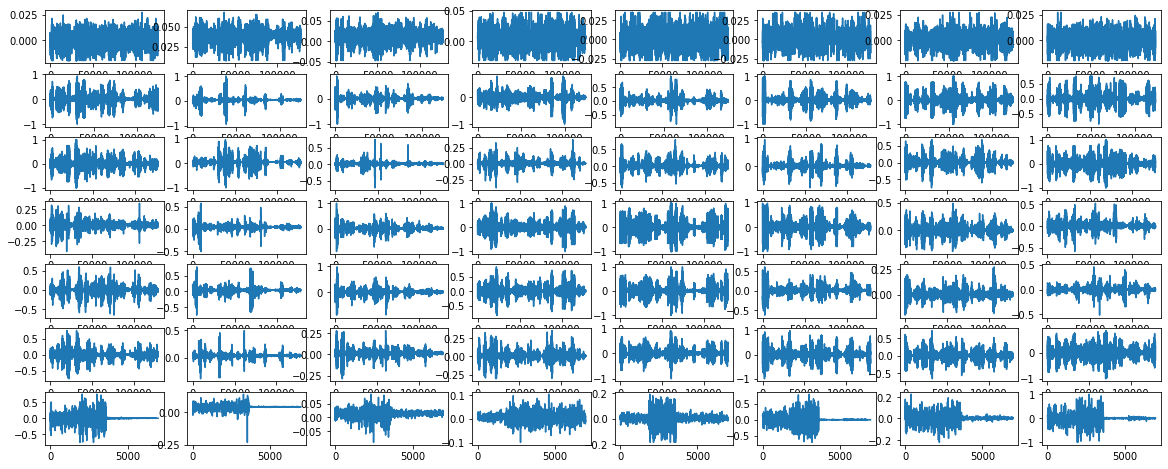

In [6]:
import matplotlib.pyplot as plt

n_features = 8
n_classes = 7

def visualize_data(X, Y):
  fig, axes = plt.subplots(n_classes, n_features, figsize=(20, 8))
  for c in range(n_classes):
    index = Y == (c+1)
    x = X[index]

    print(f'number of data points for class {c}: {x.shape}')
    for i in range(n_features):
      axes[c][i].plot(x[:, i])


visualize_data(X, Y)
plt.show()

In [10]:
# set 3,4,5 to same grouop
Y[Y == 4] = 3
Y[Y == 5] = 3

In [14]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


device = 'cuda'
classes = [1,2,3,6]
sequence_len = 8
n_classes = len(classes)

def group_data_points(X, Y):
  new_x = []
  new_y = []
  for i, c in enumerate(classes):
    index = Y == c
    x = X[index]
    num_points = len(x)
    num_points = int(num_points // sequence_len * sequence_len)
    x = x[:num_points]
    x = x.reshape([-1, sequence_len, n_features])
    new_x.append(x)
    new_y.append(np.full([len(x)], i))
    print(f'datapoints for {c}: {num_points}')

  new_x = np.concatenate(new_x)
  new_y = np.concatenate(new_y)
  return new_x, new_y


group_x, group_y = group_data_points(X, Y)
train_x, test_x, train_y, test_y = train_test_split(group_x, group_y, test_size=0.2)
train_x = torch.from_numpy(train_x).to(device)
test_x = torch.from_numpy(test_x).to(device)
train_y = torch.from_numpy(train_y).to(device)
test_y = torch.from_numpy(test_y).to(device)

print(f'Train x: {train_x.shape}, y: {train_y.shape}')
print(f'Test x: {test_x.shape}, y: {test_y.shape}')

train_dataset = TensorDataset(train_x, train_y)
test_dataset = TensorDataset(test_x, test_y)
print('Train datasize: ', len(train_dataset))
print('Test datasize: ', len(test_dataset))
print(train_dataset[0][0].shape, train_dataset[0][1].shape)


batch_size = 1024
num_workers = 0

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_dataloader = DataLoader(test_dataset, num_workers=num_workers, batch_size=batch_size)

datapoints for 1: 127560
datapoints for 2: 123968
datapoints for 3: 383920
datapoints for 6: 129064
Train x: torch.Size([76451, 8, 8]), y: torch.Size([76451])
Test x: torch.Size([19113, 8, 8]), y: torch.Size([19113])
Train datasize:  76451
Test datasize:  19113
torch.Size([8, 8]) torch.Size([])


In [15]:
import torch.nn as nn

class ClickNet(nn.Module):
  def __init__(self, n_features, n_hidden, n_sequence, n_layers, n_classes, device):
    super(ClickNet, self).__init__()
    self.n_features = n_features
    self.n_hidden = n_hidden
    self.n_sequence = n_sequence
    self.n_layers = n_layers
    self.n_classes = n_classes
    self.device = device

    self.lstm = nn.LSTM(input_size=n_features, hidden_size=n_hidden, num_layers=n_layers, batch_first=True)
    self.linear_1 = nn.Sequential(
      nn.Linear(in_features=n_hidden, out_features=64),
      nn.ReLU(),
    )
    self.dropout_1 = nn.Dropout(p=0.2)
    self.linear_2 = nn.Linear(in_features=64, out_features=n_classes)

  def forward(self, x):
    self.hidden = (
      torch.zeros(self.n_layers, x.shape[0], self.n_hidden).to(self.device),
      torch.zeros(self.n_layers, x.shape[0], self.n_hidden).to(self.device)
    )

    out, (hs, cs) = self.lstm(x.view(x.shape[0], self.n_sequence, -1), self.hidden)
    out = out[:,-1,:]
    out = self.linear_1(out)
    out = self.dropout_1(out)
    out = self.linear_2(out)
    return out


model_args = dict(
  n_features=n_features,
  n_hidden=64,
  n_sequence=sequence_len,
  n_layers=1,
  n_classes=n_classes,
  device=device
)
model = ClickNet(**model_args)
model.to(device)

sample_x, sample_y = next(iter(train_dataloader))
sample_x = sample_x.to(device)
sample_y = sample_y.to(device)
print(sample_x.shape)
y = model(sample_x)
print(y.shape)
print(sample_y.shape)

loss = nn.CrossEntropyLoss()
loss(y, sample_y)

torch.Size([1024, 8, 8])
torch.Size([1024, 4])
torch.Size([1024])


tensor(1.4114, device='cuda:0', grad_fn=<NllLossBackward0>)

In [16]:
from torch.optim import Adam, SGD, AdamW


class Trainer(object):
  def __init__(self, model, train_dataloader, test_dataloader, lr=1e-3, num_epochs=1000, device='cuda'):
    self.model = model
    self.train_dataloader = train_dataloader
    self.test_dataloader = test_dataloader
    self.num_epochs = num_epochs
    self.device = device

    self.optimizer = AdamW(self.model.parameters(), lr=lr)
    self.loss_fn = nn.CrossEntropyLoss()

  def train_step(self):
    self.model.train()

    for x, y in train_dataloader:
      y_hat = self.model(x)

      loss = self.loss_fn(y_hat, y)

      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

  def train(self):
    for epoch in range(self.num_epochs):
      self.train_step()
      if (epoch+1) % 10 == 0:
        print(f'EPOCH: {epoch+1}')
        self.evaluate(self.train_dataloader, 'Train')
        self.evaluate(self.test_dataloader, 'Test')

  def evaluate(self, dataloader, dataset):
    self.model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    loss = 0
    correct = 0
    with torch.no_grad():
      for x, y in dataloader:
        pred = self.model(x)
        loss += self.loss_fn(pred, y).item()
        pred = pred.argmax(1)
        correct += (pred == y).type(torch.float).sum().item()

    loss /= num_batches
    correct /= size
    print(f'{dataset} Accuracy: {correct}, loss: {loss}')


trainer = Trainer(model, train_dataloader, test_dataloader)
trainer.train()

EPOCH: 10
Train Accuracy: 0.6344194320545186, loss: 0.869052935441335
Test Accuracy: 0.6326060796316643, loss: 0.8726458925949899
EPOCH: 20
Train Accuracy: 0.6589580254018914, loss: 0.7961696680386862
Test Accuracy: 0.654580651912311, loss: 0.8026166464153089
EPOCH: 30
Train Accuracy: 0.6725484297131497, loss: 0.7578880906105041
Test Accuracy: 0.667556113639931, loss: 0.76669568764536
EPOCH: 40
Train Accuracy: 0.6899713542007299, loss: 0.7199537293116252
Test Accuracy: 0.6838277612096478, loss: 0.7308918551394814
EPOCH: 50
Train Accuracy: 0.7027377012727106, loss: 0.6940252526601156
Test Accuracy: 0.6991576413959085, loss: 0.7064816983122575
EPOCH: 60
Train Accuracy: 0.713149599089613, loss: 0.6735861492156983
Test Accuracy: 0.7068487416941349, loss: 0.6887273317889163
EPOCH: 70
Train Accuracy: 0.7192711671528168, loss: 0.663684622446696
Test Accuracy: 0.7090985193323915, loss: 0.6847881015978361
EPOCH: 80
Train Accuracy: 0.7316712665628965, loss: 0.6376374944051106
Test Accuracy: 0.72

In [17]:
model_checkpoint = './baseline.pt'

torch.save(model.state_dict(), model_checkpoint)

In [21]:
x = torch.randn(1, 8, 8, requires_grad=True)
x = x.to(device)

model.eval()
p = model(x)
torch.onnx.export(
  model,                     # model being run
  x,                         # model input (or a tuple for multiple inputs)
  'baseline.onnx',           # where to save the model (can be a file or file-like object)
  export_params=True,        # store the trained parameter weights inside the model file
  opset_version=11,          # the ONNX version to export the model to
  do_constant_folding=True,  # whether to execute constant folding for optimization
  input_names = ['input'],   # the model's input names
  output_names = ['output'], # the model's output names
  dynamic_axes={'input' : {1 : 'batch_size'},    # variable length axes
                'output' : {1 : 'batch_size'}})